In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df_det = pd.read_excel('/content/drive/My Drive/Courses/MA906/covid_detect_clean.xlsx')
df_det = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/covid_detect_clean.xlsx')
df_det.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,58,4.2,245.0,3.3,0.6,0.3,0.0,0.0,167.6,25.0,23.0,NaN,NaN,190.0,1
1,M,65,10.1,229.0,NaN,NaN,NaN,NaN,NaN,234.2,57.0,17.0,NaN,NaN,565.0,1
2,M,46,9.4,191.0,7.3,1.3,0.7,0.0,0.0,82.1,55.0,64.0,100.0,107.0,308.0,1
3,M,84,16.6,228.0,NaN,NaN,NaN,NaN,NaN,143.5,38.0,39.0,84.0,26.0,210.0,1
4,M,40,5.2,186.0,4.0,0.7,0.5,0.0,0.0,98.7,50.0,56.0,59.0,81.0,324.0,1


In [ ]:
# df_mort = pd.read_excel('/content/drive/My Drive/Courses/MA906/mortality.xlsx')
# df_2ndDet = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/May_2nd_data.xlsx')
df_mort = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/mortality.xlsx')
df_mort.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,73,9.67,141.0,6.23,2.50,0.76,0.16,0.02,2.6,23.0,30.0,71.0,41.0,206.0,0
1,M,61,10.37,283.0,8.79,0.95,0.59,0.01,0.03,27.4,15.0,22.0,45.0,50.0,282.0,0
2,F,70,7.68,238.0,5.09,2.10,0.47,0.01,0.01,3.6,20.0,67.0,69.0,53.0,226.0,0
3,M,74,6.78,300.0,4.89,1.12,0.58,0.17,0.02,14.5,28.0,26.0,79.0,14.0,249.0,0
4,F,29,7.95,356.0,5.20,1.88,0.59,0.24,0.04,0.8,13.0,18.0,84.0,21.0,179.0,0


In [ ]:
df_det.describe().round(2)

,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
count,279.00,277.00,277.00,209.00,209.00,209.00,209.00,208.00,273.00,277.00,266.00,131.00,136.00,194.00,279.00
mean,61.34,8.55,226.53,6.20,1.18,0.61,0.06,0.01,90.89,54.20,44.92,89.89,82.48,380.45,0.63
std,18.49,4.86,101.17,4.17,0.81,0.41,0.13,0.04,94.42,57.61,45.50,89.09,132.70,193.98,0.48
min,0.00,1.10,20.00,0.50,0.20,0.00,0.00,0.00,0.10,11.00,9.00,34.00,10.00,98.00,0.00
25%,49.00,5.10,163.00,3.50,0.70,0.40,0.00,0.00,21.40,27.00,21.00,57.50,23.75,243.25,0.00
50%,64.00,7.10,205.00,5.10,1.00,0.50,0.00,0.00,54.20,36.00,31.00,71.00,41.00,328.00,1.00
75%,76.00,10.70,271.00,7.50,1.40,0.70,0.10,0.00,129.10,60.00,46.00,90.00,83.00,454.50,1.00
max,98.00,29.20,620.00,26.40,7.20,3.20,1.30,0.30,478.00,550.00,335.00,838.00,839.00,1195.00,1.00


In [ ]:
df_mort.describe().round(2)

,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
count,375.00,357.00,356.00,356.00,356.00,356.00,356.00,356.00,353.00,356.00,356.00,356.00,356.00,356.00,375.00
mean,58.83,18.93,193.01,8.00,1.17,0.60,0.05,0.02,64.86,54.22,42.66,85.62,49.44,476.53,0.46
std,16.46,99.21,109.71,6.61,1.85,2.11,0.07,0.02,81.07,148.70,98.69,54.70,58.22,415.23,0.50
min,18.00,0.71,-1.00,0.32,0.05,0.01,0.00,0.00,0.10,6.00,5.00,17.00,7.00,110.00,0.00
25%,46.00,5.12,113.00,3.10,0.52,0.31,0.00,0.01,2.00,19.00,17.00,54.00,21.00,199.00,0.00
50%,62.00,7.93,192.00,5.38,0.99,0.43,0.02,0.02,26.30,25.00,26.00,71.00,33.00,273.50,0.00
75%,70.00,13.20,257.00,11.24,1.54,0.61,0.09,0.03,99.10,41.00,42.00,98.00,55.00,617.75,1.00
max,95.00,1726.60,554.00,32.22,33.69,39.92,0.46,0.12,320.00,1858.00,1508.00,620.00,732.00,1867.00,1.00


In [ ]:
df_det.shape, df_mort.shape

((279, 16), (375, 16))

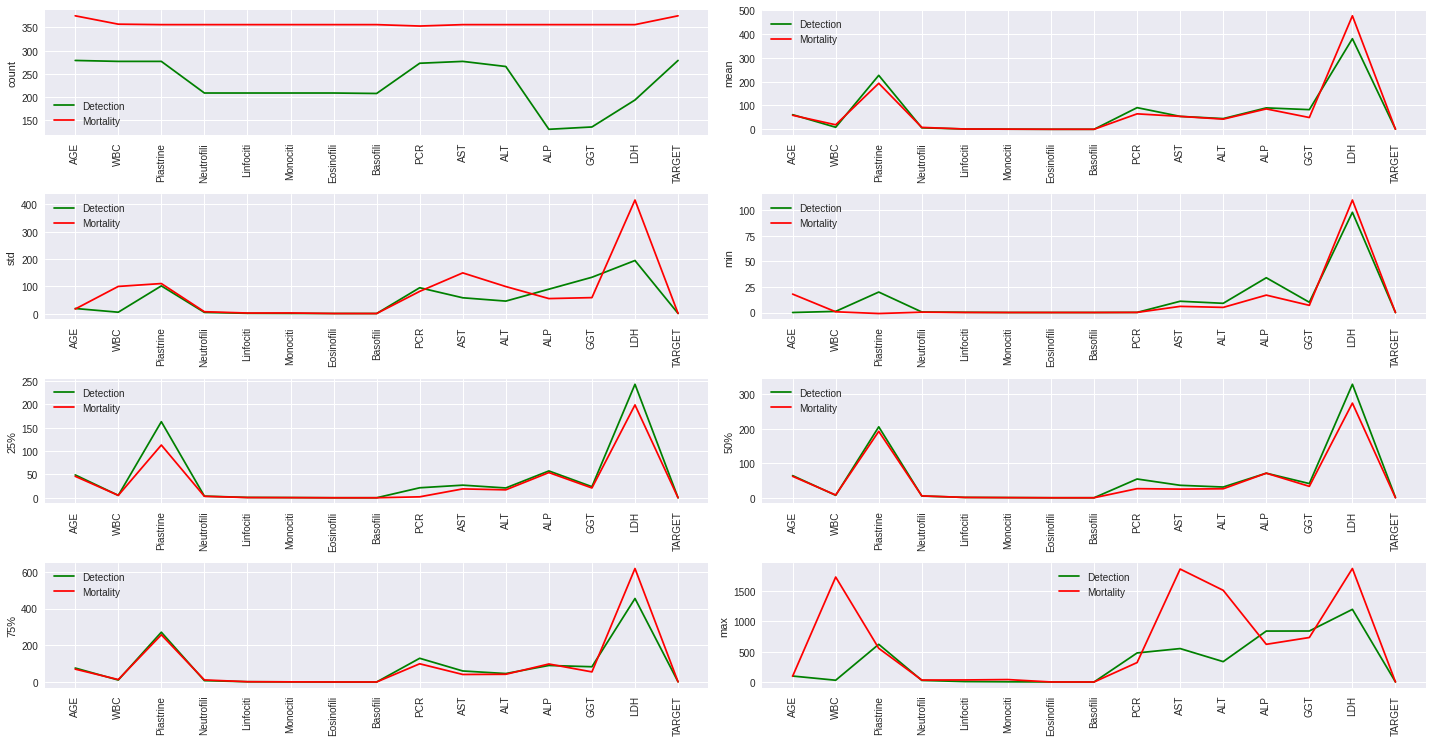

In [ ]:
COL = 'mean'
s = 1
plt.figure(figsize=(20,20))
plt.style.use('seaborn')
for j in df_det.describe().index:
  plt.subplot( len(df_det.describe()),2 ,s)
  plt.ylabel(j)
  plt.plot(df_det.describe().loc[j], c='g', label='Detection')
  plt.plot(df_mort.describe().loc[j], c='r', label='Mortality')
  plt.xticks(rotation=90)
  plt.legend()
  plt.tight_layout()
  s += 1

Iter RF

In [ ]:
X = df_det.iloc[:,1:-1].values
y = df_det.iloc[:,-1].values
Xm = df_mort.iloc[:,1:-1].values
ym = df_mort.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
imp_iter = IterativeImputer(random_state=0, max_iter=10000)
X_train_iter = imp_iter.fit_transform(X_train)
X_test_iter  = imp_iter.transform(X_test)
Xm_iter      = imp_iter.transform(Xm)

In [ ]:
param_grid_rf = [{'n_estimators' : [25, 30, 50, 70, 100, 150], 'max_depth' : [3, 4, 5, 6, 7]}]
rf_gs = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, cv=5, n_jobs=-1)
rf_gs.fit(X_train_iter, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [ ]:
rf_gs.best_score_

0.8234610917537747

In [ ]:
rf_gs.score(X_test_iter, y_test)

0.8

In [ ]:
Xm_iter.shape[0]

375

In [ ]:
rf_gs.score(Xm_iter, [1]*Xm_iter.shape[0])

0.48533333333333334

In [ ]:
rf_gs.score(Xm_iter, ym)

0.8133333333333334

In [ ]:
def fi(x):
    feature_list = ['AGE', 'WBC', 'Piastrine', 'Neutrofili', 'Linfociti', 'Monociti',
             'Eosinofili', 'Basofili', 'PCR', 'AST', 'ALT', 'ALP', 'GGT', 'LDH']
    df_fi = pd.DataFrame(columns=['features', 'importance'])
    df_fi['importance'] = x
    df_fi['features'] = feature_list
    df_fi = df_fi.sort_values('importance', ascending=True)  
    plt.barh(range(len(df_fi)), df_fi['importance'], tick_label = df_fi['features'])
    plt.show()

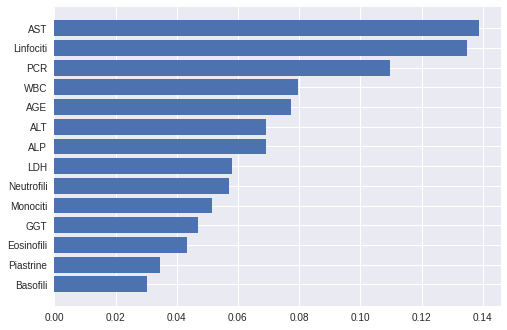

In [ ]:
rf_fi = rf_gs.best_estimator_.feature_importances_
fi(rf_fi)

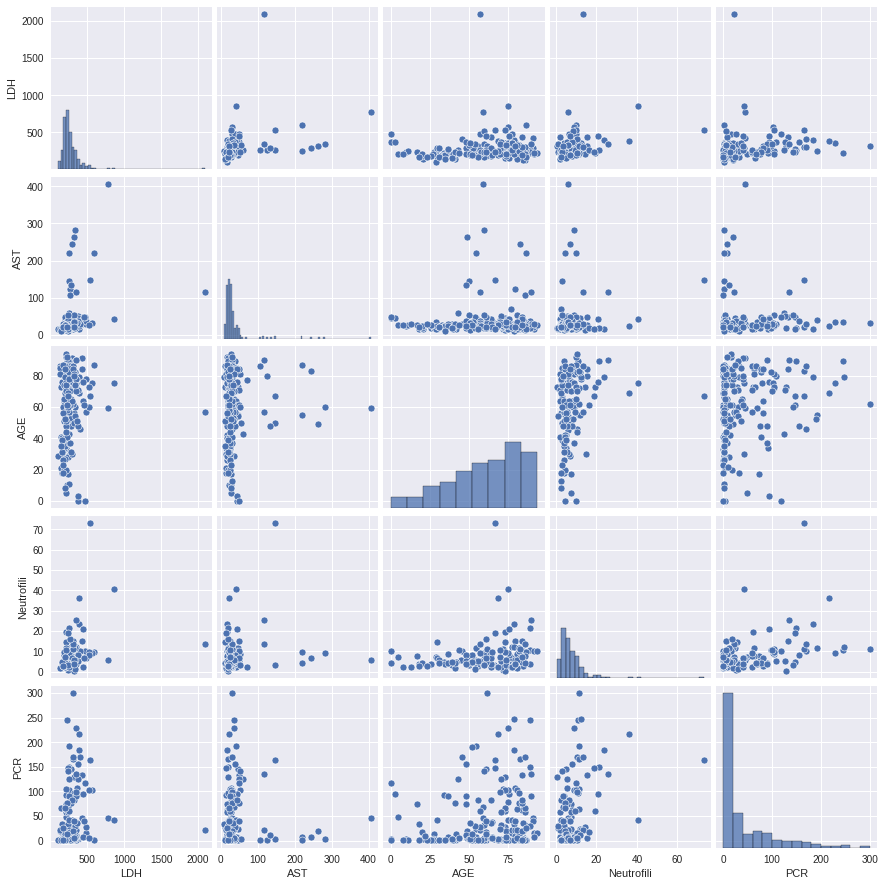

In [ ]:
import seaborn as sns

# # Only use this after finding the top 5 features
df_2nd = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/May_2nd_data.xlsx')
sns.set_palette(sns.color_palette())
data = df_2nd[['LDH', 'AST', 'AGE', 'Neutrofili', 'PCR']]
sns.pairplot(data=data, diag_kind="hist", markers=["o", "s", "D"])

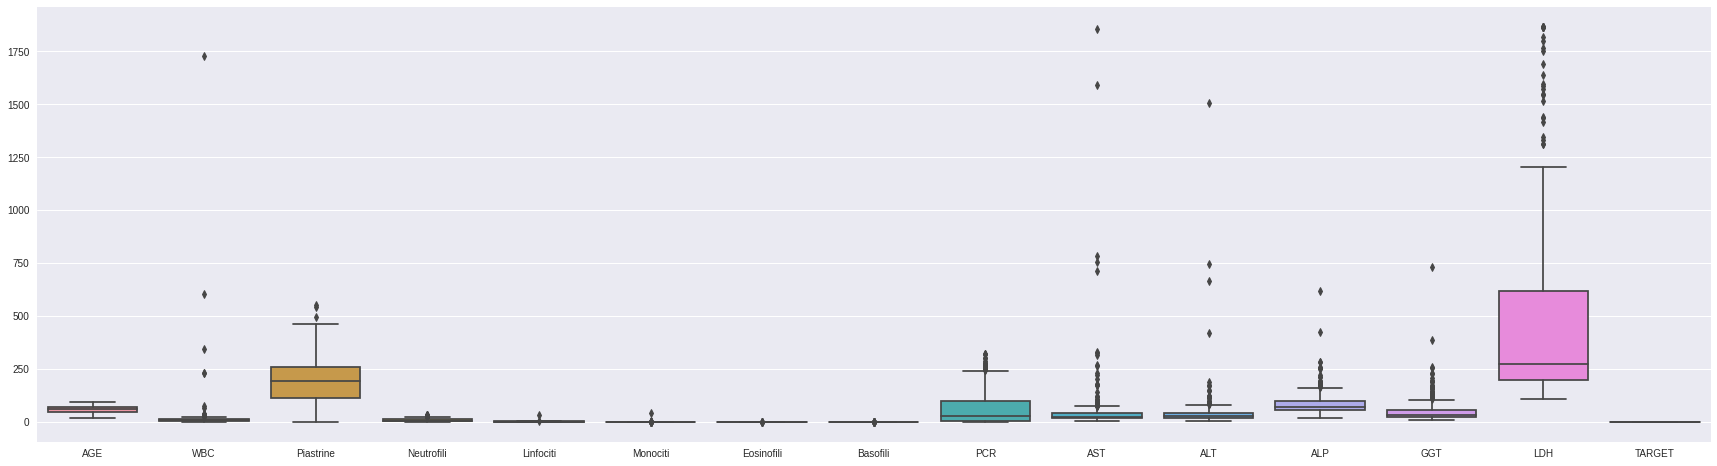

In [ ]:
plt.figure(figsize=(30,8))
sns.boxplot(data = df_mort);

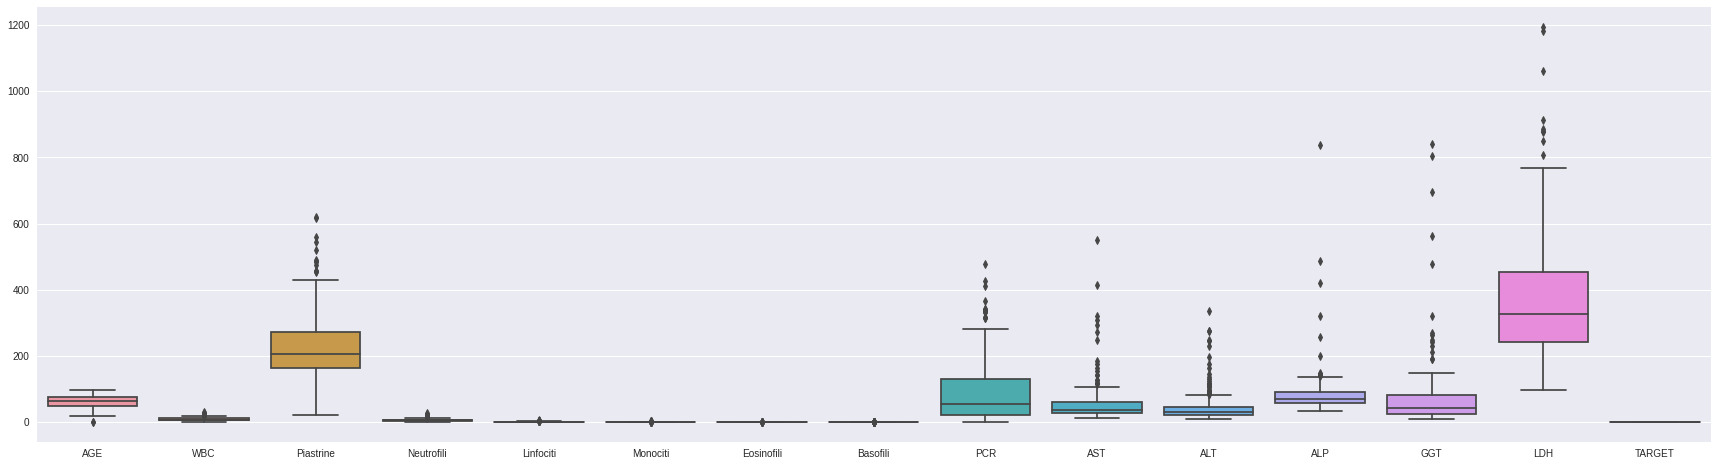

In [ ]:
plt.figure(figsize=(30,8))
sns.boxplot(data = df_det);

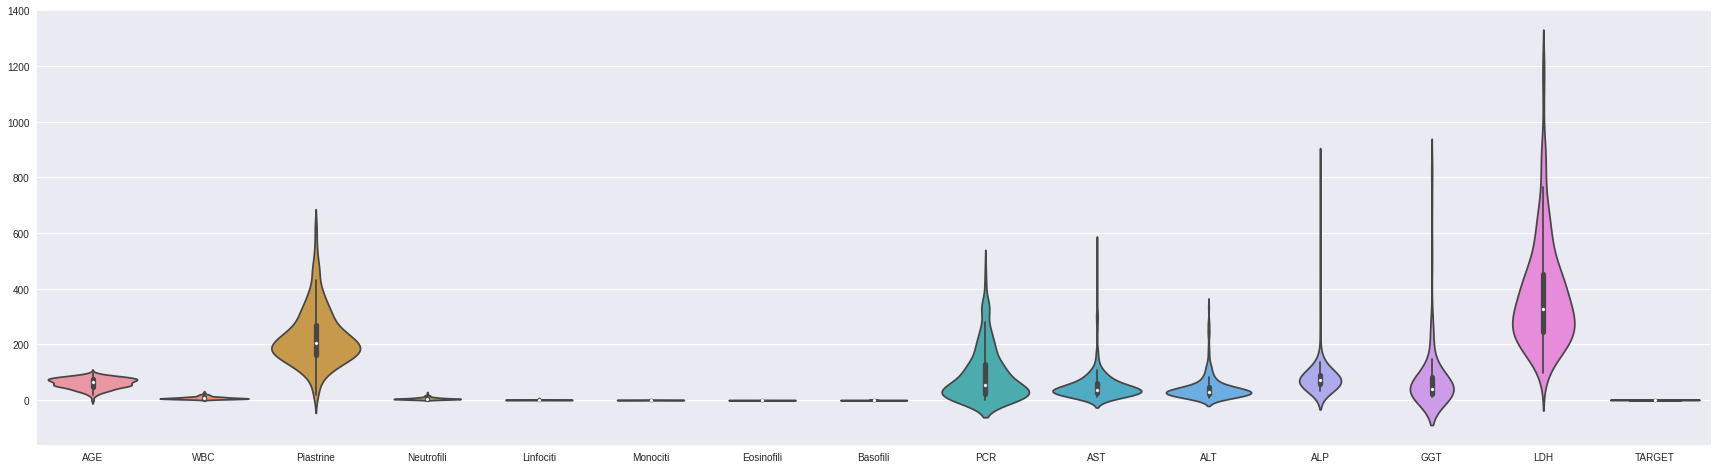

In [ ]:
plt.figure(figsize=(30,8))
sns.violinplot(data = df_det, scale='count');
# plt.ylim(0,800)

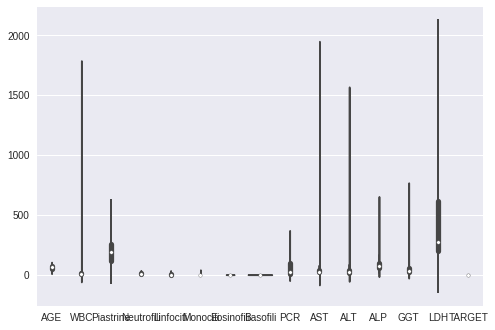

In [ ]:
sns.violinplot(data = df_mort);

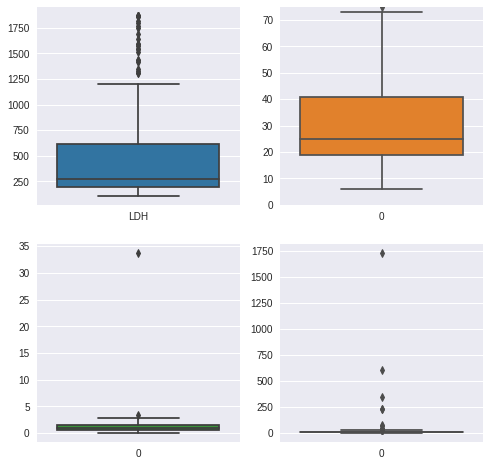

In [ ]:
plt.figure(figsize=(8, 8))

plt.subplot(2,2,1)
sns.boxplot(data = df_mort['LDH'], color='tab:blue');
plt.xticks([0], ['LDH'])

plt.subplot(2,2,2)
plt.ylim(0,75)
sns.boxplot(data = df_mort['AST'], color='tab:orange');

plt.subplot(2,2,3)
sns.boxplot(data = df_mort['Linfociti'], color='tab:green');

plt.subplot(2,2,4)
sns.boxplot(data = df_mort['WBC'], color='tab:red');

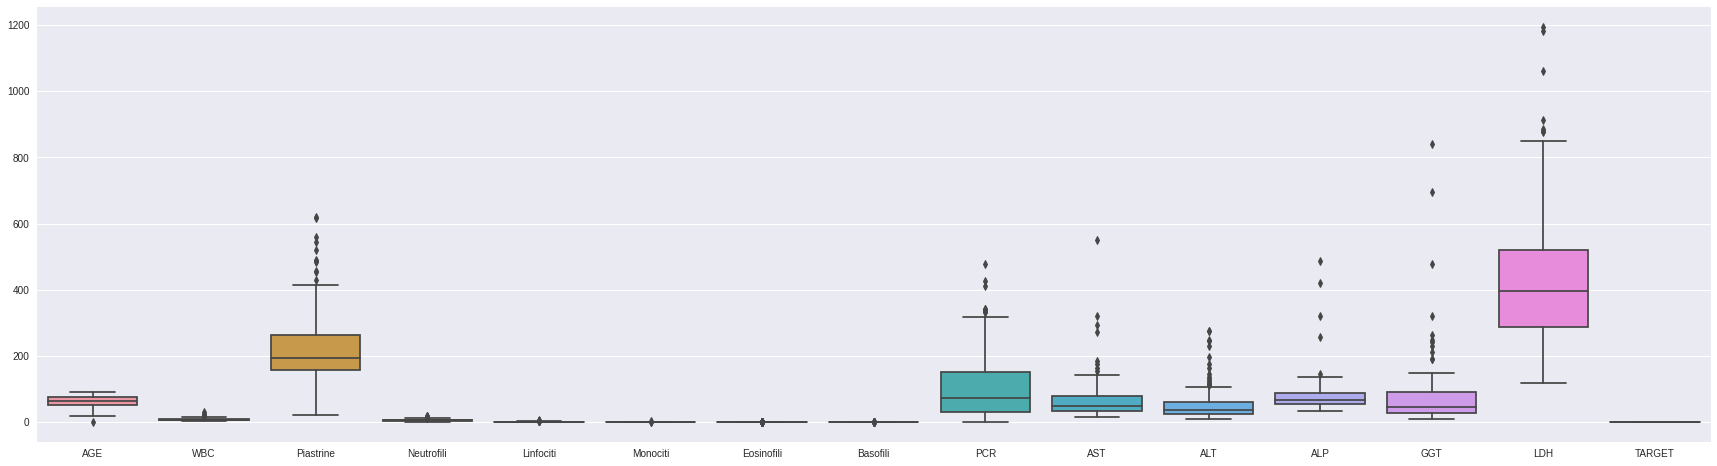

In [ ]:
plt.figure(figsize=(30,8))
sns.boxplot(data = df_det[df_det['TARGET']==1]);

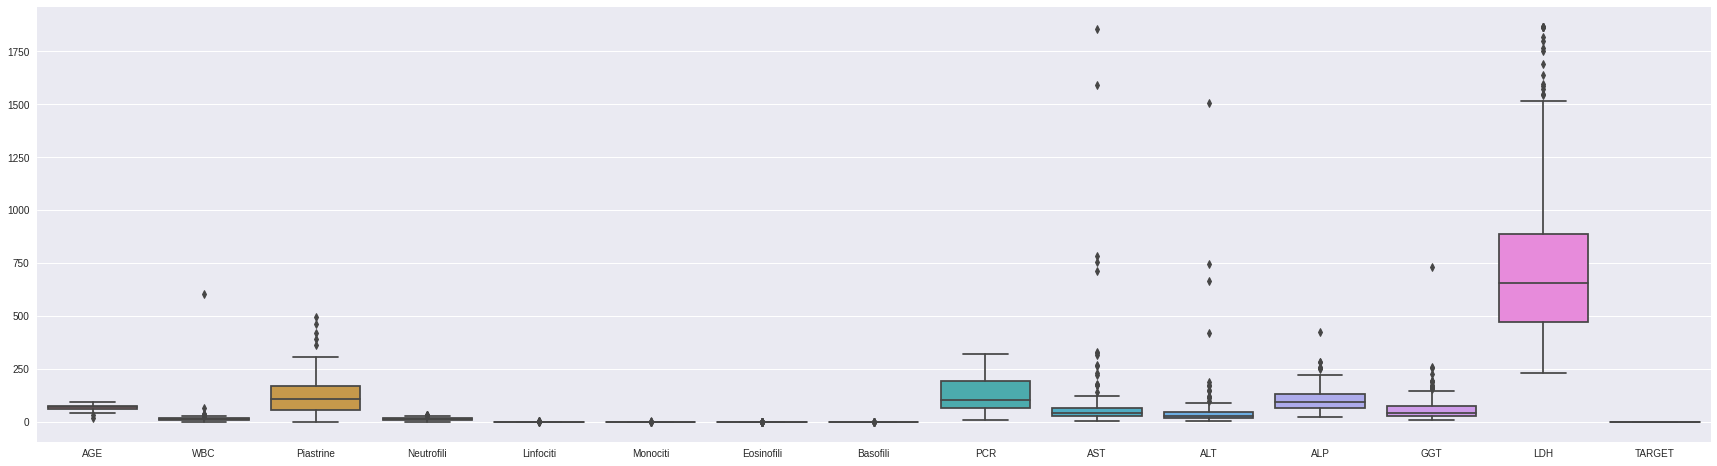

In [ ]:
plt.figure(figsize=(30,8))
sns.boxplot(data = df_mort[df_mort['TARGET']==1]);